# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [2]:
!pip3 install tensorflow keras

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.1.1 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.4.0 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd

import numpy as np
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

In [5]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
Y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

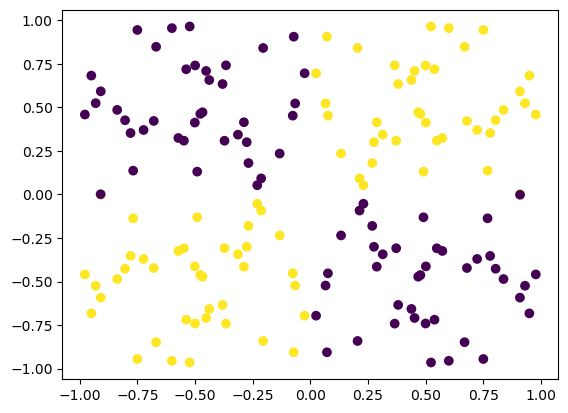

In [6]:
plt.scatter(*zip(*X), c = Y)

## Using Diabetes data 

http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [16]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [20]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
77/77 [==============================] - 0s 848us/step - loss: 0.6358 - accuracy: 0.6315
Epoch 2/1000
77/77 [==============================] - 0s 877us/step - loss: 0.6201 - accuracy: 0.6484
Epoch 3/1000
77/77 [==============================] - 0s 866us/step - loss: 0.6077 - accuracy: 0.6693
Epoch 4/1000
77/77 [==============================] - 0s 873us/step - loss: 0.6007 - accuracy: 0.6510
Epoch 5/1000
77/77 [==============================] - 0s 983us/step - loss: 0.6030 - accuracy: 0.6419
Epoch 6/1000
77/77 [==============================] - 0s 917us/step - loss: 0.5951 - accuracy: 0.6549
Epoch 7/1000
77/77 [==============================] - 0s 905us/step - loss: 0.5989 - accuracy: 0.6380
Epoch 8/1000
77/77 [==============================] - 0s 991us/step - loss: 0.5918 - accuracy: 0.6549
Epoch 9/1000
77/77 [==============================] - 0s 972us/step - loss: 0.6005 - accuracy: 0.6510
Epoch 10/1000
77/77 [==============================] - 0s 933us/step - loss: 0.598

77/77 [==============================] - 0s 996us/step - loss: 0.5461 - accuracy: 0.7188
Epoch 82/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5437 - accuracy: 0.7227
Epoch 83/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5396 - accuracy: 0.7396
Epoch 84/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5390 - accuracy: 0.7318
Epoch 85/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.7396
Epoch 86/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.7383
Epoch 87/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5383 - accuracy: 0.7214
Epoch 88/1000
77/77 [==============================] - 0s 947us/step - loss: 0.5410 - accuracy: 0.7253
Epoch 89/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5424 - accuracy: 0.7253
Epoch 90/1000
77/77 [==============================] - 0s 953us/step - loss: 0.5400 - accuracy: 0.734

77/77 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.7422
Epoch 161/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.7370
Epoch 162/1000
77/77 [==============================] - 0s 962us/step - loss: 0.5115 - accuracy: 0.7552
Epoch 163/1000
77/77 [==============================] - 0s 874us/step - loss: 0.5193 - accuracy: 0.7344
Epoch 164/1000
77/77 [==============================] - 0s 819us/step - loss: 0.5179 - accuracy: 0.7422
Epoch 165/1000
77/77 [==============================] - 0s 866us/step - loss: 0.5189 - accuracy: 0.7383
Epoch 166/1000
77/77 [==============================] - 0s 891us/step - loss: 0.5116 - accuracy: 0.7448
Epoch 167/1000
77/77 [==============================] - 0s 840us/step - loss: 0.5174 - accuracy: 0.7448
Epoch 168/1000
77/77 [==============================] - 0s 897us/step - loss: 0.5172 - accuracy: 0.7448
Epoch 169/1000
77/77 [==============================] - 0s 878us/step - loss: 0.515

77/77 [==============================] - 0s 934us/step - loss: 0.5121 - accuracy: 0.7383
Epoch 240/1000
77/77 [==============================] - 0s 943us/step - loss: 0.5217 - accuracy: 0.7344
Epoch 241/1000
77/77 [==============================] - 0s 936us/step - loss: 0.5128 - accuracy: 0.7422
Epoch 242/1000
77/77 [==============================] - 0s 988us/step - loss: 0.5140 - accuracy: 0.7461
Epoch 243/1000
77/77 [==============================] - 0s 985us/step - loss: 0.5095 - accuracy: 0.7578
Epoch 244/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.7448
Epoch 245/1000
77/77 [==============================] - 0s 998us/step - loss: 0.5091 - accuracy: 0.7487
Epoch 246/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7500
Epoch 247/1000
77/77 [==============================] - 0s 989us/step - loss: 0.5230 - accuracy: 0.7422
Epoch 248/1000
77/77 [==============================] - 0s 977us/step - loss: 0.511

77/77 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.7396
Epoch 319/1000
77/77 [==============================] - 0s 882us/step - loss: 0.5001 - accuracy: 0.7448
Epoch 320/1000
77/77 [==============================] - 0s 885us/step - loss: 0.4999 - accuracy: 0.7487
Epoch 321/1000
77/77 [==============================] - 0s 901us/step - loss: 0.4998 - accuracy: 0.7500
Epoch 322/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.7435
Epoch 323/1000
77/77 [==============================] - 0s 851us/step - loss: 0.5024 - accuracy: 0.7513
Epoch 324/1000
77/77 [==============================] - 0s 926us/step - loss: 0.4972 - accuracy: 0.7526
Epoch 325/1000
77/77 [==============================] - 0s 882us/step - loss: 0.5047 - accuracy: 0.7448
Epoch 326/1000
77/77 [==============================] - 0s 877us/step - loss: 0.5060 - accuracy: 0.7435
Epoch 327/1000
77/77 [==============================] - 0s 884us/step - loss: 0.498

77/77 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7474
Epoch 398/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5058 - accuracy: 0.7422
Epoch 399/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7526
Epoch 400/1000
77/77 [==============================] - 0s 986us/step - loss: 0.4978 - accuracy: 0.7526
Epoch 401/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.7513
Epoch 402/1000
77/77 [==============================] - 0s 979us/step - loss: 0.4985 - accuracy: 0.7604
Epoch 403/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.7552
Epoch 404/1000
77/77 [==============================] - 0s 979us/step - loss: 0.4972 - accuracy: 0.7461
Epoch 405/1000
77/77 [==============================] - 0s 921us/step - loss: 0.4888 - accuracy: 0.7669
Epoch 406/1000
77/77 [==============================] - 0s 998us/step - loss: 0.4966 - ac

77/77 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.7604
Epoch 477/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7500
Epoch 478/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.7526
Epoch 479/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4899 - accuracy: 0.7539
Epoch 480/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.7344
Epoch 481/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.5013 - accuracy: 0.7318
Epoch 482/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.7357
Epoch 483/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7435
Epoch 484/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.7370
Epoch 485/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.

77/77 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.7656
Epoch 557/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7487
Epoch 558/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.7578
Epoch 559/1000
77/77 [==============================] - 0s 990us/step - loss: 0.4929 - accuracy: 0.7435
Epoch 560/1000
77/77 [==============================] - 0s 1000us/step - loss: 0.4872 - accuracy: 0.7565
Epoch 561/1000
77/77 [==============================] - 0s 973us/step - loss: 0.4855 - accuracy: 0.7591
Epoch 562/1000
77/77 [==============================] - 0s 994us/step - loss: 0.4965 - accuracy: 0.7526
Epoch 563/1000
77/77 [==============================] - 0s 998us/step - loss: 0.4788 - accuracy: 0.7656
Epoch 564/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.7552
Epoch 565/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4776 - a

77/77 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7604
Epoch 637/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7669
Epoch 638/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7617
Epoch 639/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.7643
Epoch 640/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.7539
Epoch 641/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.7656
Epoch 642/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7565
Epoch 643/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.7604
Epoch 644/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.7760
Epoch 645/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.

77/77 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.7604
Epoch 717/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.7604
Epoch 718/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.7630
Epoch 719/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7734
Epoch 720/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7500
Epoch 721/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7643
Epoch 722/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.7682
Epoch 723/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.7669
Epoch 724/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.7721
Epoch 725/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.

77/77 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7630
Epoch 797/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7565
Epoch 798/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.7708
Epoch 799/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7773
Epoch 800/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4790 - accuracy: 0.7695
Epoch 801/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.7552
Epoch 802/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7695
Epoch 803/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.7695
Epoch 804/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7617
Epoch 805/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.

77/77 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.7852
Epoch 877/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7760
Epoch 878/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.7773
Epoch 879/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7695
Epoch 880/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.7786
Epoch 881/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7839
Epoch 882/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.7760
Epoch 883/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.7760
Epoch 884/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7799
Epoch 885/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.

77/77 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7721
Epoch 957/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7826
Epoch 958/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.7760
Epoch 959/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.7839
Epoch 960/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.7734
Epoch 961/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7747
Epoch 962/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.7812
Epoch 963/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4600 - accuracy: 0.7865
Epoch 964/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.7773
Epoch 965/1000
77/77 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.

In [27]:
## PART 1 - 1
num_layers = [2,3,4,5]
scores = []
layernum = []
model = Sequential()
model.add(Dense(16, input_dim = 8, activation = 'tanh'))
layer = Dense(1, activation = 'sigmoid')

for num_layer in num_layers:
    
    print(num_layer)
    model.add(layer)
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    model.fit(X, Y, epochs = 400, batch_size = 8)
    score = model.evaluate(X, Y)
    scores.append(score)
    layernum.append(num_layer)
plt.scatter(*zip(*X), c = model.predict(X))

2
Epoch 1/400
96/96 [==============================] - 1s 3ms/step - loss: 0.6631 - accuracy: 0.6211
Epoch 2/400
96/96 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.6628
Epoch 3/400
96/96 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.6680
Epoch 4/400
96/96 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.6810
Epoch 5/400
96/96 [==============================] - 0s 1ms/step - loss: 0.6060 - accuracy: 0.6654
Epoch 6/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5979 - accuracy: 0.6745
Epoch 7/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5991 - accuracy: 0.6654
Epoch 8/400
96/96 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.6641
Epoch 9/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.6693
Epoch 10/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5978 - accuracy: 0.6732
Epoch 1

Epoch 83/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5688 - accuracy: 0.7005
Epoch 84/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5659 - accuracy: 0.7018
Epoch 85/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5638 - accuracy: 0.6966
Epoch 86/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5684 - accuracy: 0.7031
Epoch 87/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5646 - accuracy: 0.7031
Epoch 88/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7044
Epoch 89/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.7044
Epoch 90/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5684 - accuracy: 0.6966
Epoch 91/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.6992
Epoch 92/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5678 - accuracy: 0.6901


96/96 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.7148
Epoch 165/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.7201
Epoch 166/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5491 - accuracy: 0.7214
Epoch 167/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5418 - accuracy: 0.7279
Epoch 168/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.7253
Epoch 169/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5400 - accuracy: 0.7292
Epoch 170/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.7135
Epoch 171/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5475 - accuracy: 0.7109
Epoch 172/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5486 - accuracy: 0.7201
Epoch 173/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.7240
Epoc

96/96 [==============================] - 0s 1ms/step - loss: 0.5343 - accuracy: 0.7122
Epoch 246/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.7161
Epoch 247/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7070
Epoch 248/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.7135
Epoch 249/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.7161
Epoch 250/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.7161
Epoch 251/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.7109
Epoch 252/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.7148
Epoch 253/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.7135
Epoch 254/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5299 - accuracy: 0.7122
Epoc

96/96 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.7096
Epoch 327/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5282 - accuracy: 0.7057
Epoch 328/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.7057
Epoch 329/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.7161
Epoch 330/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5269 - accuracy: 0.7188
Epoch 331/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5261 - accuracy: 0.7122
Epoch 332/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5241 - accuracy: 0.7161
Epoch 333/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5227 - accuracy: 0.7161
Epoch 334/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.7201
Epoch 335/400
96/96 [==============================] - 0s 1ms/step - loss: 0.5288 - accuracy: 0.7122
Epoc

ValueError: Exception encountered when calling layer "dense_41" (type Dense).

Dimensions must be equal, but are 1 and 16 for '{{node dense_41/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](Placeholder, dense_41/MatMul/ReadVariableOp)' with input shapes: [?,1], [16,1].

Call arguments received by layer "dense_41" (type Dense):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)

In [70]:
scores
#Most optimal = 4 hidden layers

[[0.580464243888855, 0.6875],
 [0.571671187877655, 0.6625000238418579],
 [0.5723119378089905, 0.6625000238418579],
 [0.57209712266922, 0.6625000238418579]]

2
Epoch 1/400
54/54 [==============================] - 1s 2ms/step - loss: 0.7304 - accuracy: 0.5000
Epoch 2/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7251 - accuracy: 0.5000
Epoch 3/400
54/54 [==============================] - 0s 1ms/step - loss: 0.7205 - accuracy: 0.5000
Epoch 4/400
54/54 [==============================] - 0s 1ms/step - loss: 0.7165 - accuracy: 0.5000
Epoch 5/400
54/54 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5000
Epoch 6/400
54/54 [==============================] - 0s 1ms/step - loss: 0.7104 - accuracy: 0.5000
Epoch 7/400
54/54 [==============================] - 0s 1ms/step - loss: 0.7082 - accuracy: 0.5000
Epoch 8/400
54/54 [==============================] - 0s 1ms/step - loss: 0.7060 - accuracy: 0.5000
Epoch 9/400
54/54 [==============================] - 0s 1ms/step - loss: 0.7046 - accuracy: 0.5000
Epoch 10/400
54/54 [==============================] - 0s 1ms/step - loss: 0.7027 - accuracy: 0.5000
Epoch 1

Epoch 83/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4938
Epoch 84/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 85/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5312
Epoch 86/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5188
Epoch 87/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5063
Epoch 88/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5375
Epoch 89/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 90/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4750
Epoch 91/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5312
Epoch 92/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5125


54/54 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5562
Epoch 246/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5437
Epoch 247/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5500
Epoch 248/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5562
Epoch 249/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5750
Epoch 250/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5625
Epoch 251/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5625
Epoch 252/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5750
Epoch 253/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5625
Epoch 254/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5688
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.7164 - accuracy: 0.5000
Epoch 7/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7147 - accuracy: 0.5000
Epoch 8/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7132 - accuracy: 0.5000
Epoch 9/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.5000
Epoch 10/400
54/54 [==============================] - 0s 1ms/step - loss: 0.7109 - accuracy: 0.5000
Epoch 11/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7098 - accuracy: 0.4875
Epoch 12/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.4875
Epoch 13/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7080 - accuracy: 0.4875
Epoch 14/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.4688
Epoch 15/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.4500
Epoch 16/400
54/

54/54 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.6438
Epoch 89/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.6438
Epoch 90/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.6062
Epoch 91/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.6438
Epoch 92/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5750
Epoch 93/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.6438
Epoch 94/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.6313
Epoch 95/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5938
Epoch 96/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4187
Epoch 97/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.6062
Epoch 98/400


54/54 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6812
Epoch 251/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.6875
Epoch 252/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.6875
Epoch 253/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.6875
Epoch 254/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.6875
Epoch 255/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.6750
Epoch 256/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6812
Epoch 257/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.6750
Epoch 258/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.6812
Epoch 259/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.6875
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.7166 - accuracy: 0.4000
Epoch 12/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7159 - accuracy: 0.4062
Epoch 13/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.4187
Epoch 14/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7148 - accuracy: 0.4125
Epoch 15/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.4187
Epoch 16/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.4187
Epoch 17/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7133 - accuracy: 0.4375
Epoch 18/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7127 - accuracy: 0.4313
Epoch 19/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.4437
Epoch 20/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7118 - accuracy: 0.4437
Epoch 21/400


54/54 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.3375
Epoch 94/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.3438
Epoch 95/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.3313
Epoch 96/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.3375
Epoch 97/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.3313
Epoch 98/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.3313
Epoch 99/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.3313
Epoch 100/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.3500
Epoch 101/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.3562
Epoch 102/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.3438
Epoch 103/

54/54 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6687
Epoch 256/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.6625
Epoch 257/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6687
Epoch 258/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.6625
Epoch 259/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.6625
Epoch 260/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.6812
Epoch 261/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.6687
Epoch 262/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6687
Epoch 263/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.6687
Epoch 264/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6625
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.4000
Epoch 17/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7150 - accuracy: 0.4250
Epoch 18/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7144 - accuracy: 0.4688
Epoch 19/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7139 - accuracy: 0.4563
Epoch 20/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7133 - accuracy: 0.5000
Epoch 21/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7127 - accuracy: 0.5000
Epoch 22/400
54/54 [==============================] - 0s 1ms/step - loss: 0.7122 - accuracy: 0.5000
Epoch 23/400
54/54 [==============================] - 0s 1ms/step - loss: 0.7118 - accuracy: 0.5000
Epoch 24/400
54/54 [==============================] - 0s 1ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 25/400
54/54 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.5000
Epoch 26/400


54/54 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 99/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 100/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 101/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 102/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 103/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 104/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 105/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 106/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 107/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch

54/54 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.6625
Epoch 261/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.6687
Epoch 262/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.6687
Epoch 263/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.6625
Epoch 264/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.6625
Epoch 265/400
54/54 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.6625
Epoch 266/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.6625
Epoch 267/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.6625
Epoch 268/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.6625
Epoch 269/400
54/54 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.6625
Epoc

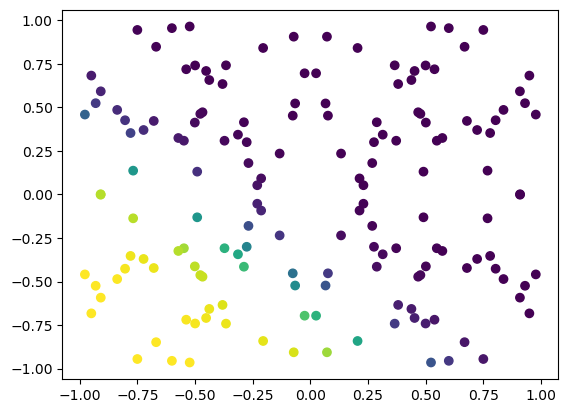

In [64]:
## PART 1 - 2
num_layers = [2,3,4,5]
scores2 = []
layernum2 = []
model2 = Sequential()
model2.add(Dense(1, input_dim = 2, activation = 'sigmoid'))
layer2 = Dense(1, activation = 'sigmoid')

for num_layer in num_layers:
    
    print(num_layer)
    model2.add(layer2)
    model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    model2.fit(X, Y, epochs = 400, batch_size = 3)
    score2 = model2.evaluate(X, Y)
    scores2.append(score2)
    layernum2.append(num_layer)
plt.scatter(*zip(*X), c = model2.predict(X))

In [65]:
scores2
##accuracy is similar but there is a little bit greater loss so 2 neurons is better overall

[[0.6609174013137817, 0.612500011920929],
 [0.651681125164032, 0.6875],
 [0.6483476758003235, 0.6875],
 [0.6569485664367676, 0.675000011920929]]

2
Epoch 1/400
40/40 [==============================] - 1s 1ms/step - loss: 0.7012 - accuracy: 0.5000
Epoch 2/400
40/40 [==============================] - 0s 1ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 3/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 4/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.5000
Epoch 5/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 6/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 7/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 8/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 9/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 10/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1

Epoch 83/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5500
Epoch 84/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.4625
Epoch 85/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5250
Epoch 86/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5312
Epoch 87/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5500
Epoch 88/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5125
Epoch 89/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5250
Epoch 90/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5688
Epoch 91/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5562
Epoch 92/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5375


40/40 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.6062
Epoch 246/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.6125
Epoch 247/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.6125
Epoch 248/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.6187
Epoch 249/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.6187
Epoch 250/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.6125
Epoch 251/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.6187
Epoch 252/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6187
Epoch 253/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.6250
Epoch 254/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.6250
Epoc

40/40 [==============================] - 0s 2ms/step - loss: 0.8773 - accuracy: 0.4062
Epoch 7/400
40/40 [==============================] - 0s 2ms/step - loss: 0.8713 - accuracy: 0.3938
Epoch 8/400
40/40 [==============================] - 0s 2ms/step - loss: 0.8654 - accuracy: 0.3875
Epoch 9/400
40/40 [==============================] - 0s 2ms/step - loss: 0.8593 - accuracy: 0.3875
Epoch 10/400
40/40 [==============================] - 0s 2ms/step - loss: 0.8534 - accuracy: 0.3875
Epoch 11/400
40/40 [==============================] - 0s 2ms/step - loss: 0.8477 - accuracy: 0.3875
Epoch 12/400
40/40 [==============================] - 0s 2ms/step - loss: 0.8417 - accuracy: 0.3875
Epoch 13/400
40/40 [==============================] - 0s 2ms/step - loss: 0.8360 - accuracy: 0.3875
Epoch 14/400
40/40 [==============================] - 0s 2ms/step - loss: 0.8305 - accuracy: 0.3812
Epoch 15/400
40/40 [==============================] - 0s 2ms/step - loss: 0.8250 - accuracy: 0.3812
Epoch 16/400
40/

40/40 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.5000
Epoch 89/400
40/40 [==============================] - 0s 1ms/step - loss: 0.7021 - accuracy: 0.5000
Epoch 90/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.5000
Epoch 91/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.5000
Epoch 92/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.5000
Epoch 93/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5000
Epoch 94/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.5000
Epoch 95/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.5000
Epoch 96/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 97/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 98/400


40/40 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.3750
Epoch 251/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5125
Epoch 252/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4062
Epoch 253/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.3500
Epoch 254/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 255/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4062
Epoch 256/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4250
Epoch 257/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5063
Epoch 258/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5063
Epoch 259/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4875
Epoc

40/40 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.5000
Epoch 12/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.5000
Epoch 13/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5000
Epoch 14/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.5000
Epoch 15/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 16/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 17/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 18/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 19/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 20/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 21/400


40/40 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 94/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 95/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 96/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 97/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 98/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 99/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 100/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 101/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 102/400
40/40 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 103/

40/40 [==============================] - 0s 1ms/step - loss: 0.5973 - accuracy: 0.6938
Epoch 256/400
40/40 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.6938
Epoch 257/400
40/40 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.6938
Epoch 258/400
40/40 [==============================] - 0s 1ms/step - loss: 0.5967 - accuracy: 0.6938
Epoch 259/400
40/40 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.6938
Epoch 260/400
40/40 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.6938
Epoch 261/400
40/40 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.6938
Epoch 262/400
40/40 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.6938
Epoch 263/400
40/40 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.6938
Epoch 264/400
40/40 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.6938
Epoc

40/40 [==============================] - 0s 1ms/step - loss: 1.1267 - accuracy: 0.5000
Epoch 17/400
40/40 [==============================] - 0s 1ms/step - loss: 1.1152 - accuracy: 0.5000
Epoch 18/400
40/40 [==============================] - 0s 1ms/step - loss: 1.1041 - accuracy: 0.5000
Epoch 19/400
40/40 [==============================] - 0s 1ms/step - loss: 1.0935 - accuracy: 0.5000
Epoch 20/400
40/40 [==============================] - 0s 1ms/step - loss: 1.0835 - accuracy: 0.5000
Epoch 21/400
40/40 [==============================] - 0s 1ms/step - loss: 1.0743 - accuracy: 0.5000
Epoch 22/400
40/40 [==============================] - 0s 1ms/step - loss: 1.0654 - accuracy: 0.5000
Epoch 23/400
40/40 [==============================] - 0s 2ms/step - loss: 1.0569 - accuracy: 0.5000
Epoch 24/400
40/40 [==============================] - 0s 2ms/step - loss: 1.0491 - accuracy: 0.5000
Epoch 25/400
40/40 [==============================] - 0s 2ms/step - loss: 1.0417 - accuracy: 0.5000
Epoch 26/400


40/40 [==============================] - 0s 2ms/step - loss: 0.7686 - accuracy: 0.5000
Epoch 99/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7657 - accuracy: 0.5000
Epoch 100/400
40/40 [==============================] - 0s 1ms/step - loss: 0.7631 - accuracy: 0.5000
Epoch 101/400
40/40 [==============================] - 0s 1ms/step - loss: 0.7602 - accuracy: 0.5000
Epoch 102/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7576 - accuracy: 0.5000
Epoch 103/400
40/40 [==============================] - 0s 1ms/step - loss: 0.7552 - accuracy: 0.5000
Epoch 104/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7525 - accuracy: 0.5000
Epoch 105/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7501 - accuracy: 0.5000
Epoch 106/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7477 - accuracy: 0.5000
Epoch 107/400
40/40 [==============================] - 0s 2ms/step - loss: 0.7456 - accuracy: 0.5000
Epoch

40/40 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5562
Epoch 261/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5437
Epoch 262/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.5312
Epoch 263/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5375
Epoch 264/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5500
Epoch 265/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5250
Epoch 266/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5437
Epoch 267/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5500
Epoch 268/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5437
Epoch 269/400
40/40 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5188
Epoc

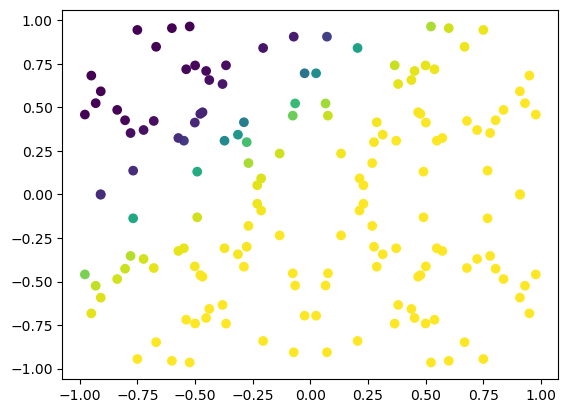

In [66]:
## PART 1 - 3
num_layers = [2,3,4,5]
scores3 = []
layernum3 = []
model3 = Sequential()
model3.add(Dense(1, input_dim = 2, activation = 'sigmoid'))
layer3 = Dense(1, activation = 'sigmoid')

for num_layer in num_layers:
    
    print(num_layer)
    model3.add(layer3)
    model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    model3.fit(X, Y, epochs = 400, batch_size = 4)
    score3 = model3.evaluate(X, Y)
    scores3.append(score3)
    layernum3.append(num_layer)
plt.scatter(*zip(*X), c = model3.predict(X))

In [67]:
scores3 
#similar to other 2 as far as accuracy but overall has a lower loss so the 4 neuron would be the most optimal
#with the 2 hidden layers being the most accurate and with the lowest amount of error

[[0.606827974319458, 0.6812499761581421],
 [0.6927635073661804, 0.6187499761581421],
 [0.5837792158126831, 0.6875],
 [0.5972124338150024, 0.6875]]

Epoch 1/1000
40/40 [==============================] - 1s 2ms/step - loss: 4.4091 - accuracy: 0.5000
Epoch 2/1000
40/40 [==============================] - 0s 1ms/step - loss: 4.0516 - accuracy: 0.5000
Epoch 3/1000
40/40 [==============================] - 0s 1ms/step - loss: 3.3395 - accuracy: 0.5000
Epoch 4/1000
40/40 [==============================] - 0s 1ms/step - loss: 1.5205 - accuracy: 0.5000
Epoch 5/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.9952 - accuracy: 0.5000
Epoch 6/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.9416 - accuracy: 0.5000
Epoch 7/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.9069 - accuracy: 0.5000
Epoch 8/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.8801 - accuracy: 0.5000
Epoch 9/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.8567 - accuracy: 0.5000
Epoch 10/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8374 - accuracy: 0.5000

40/40 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5625
Epoch 163/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5938
Epoch 164/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5750
Epoch 165/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5625
Epoch 166/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6062
Epoch 167/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5750
Epoch 168/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5625
Epoch 169/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5750
Epoch 170/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6000
Epoch 171/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 0.5782 - accuracy: 0.6875
Epoch 323/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.6875
Epoch 324/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5778 - accuracy: 0.6812
Epoch 325/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.6875
Epoch 326/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5775 - accuracy: 0.6875
Epoch 327/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.6812
Epoch 328/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.6812
Epoch 329/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.6875
Epoch 330/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5771 - accuracy: 0.6812
Epoch 331/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.6750
Epoch 483/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5703 - accuracy: 0.6750
Epoch 484/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.6750
Epoch 485/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5710 - accuracy: 0.6750
Epoch 486/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5703 - accuracy: 0.6750
Epoch 487/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.6750
Epoch 488/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.6750
Epoch 489/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5702 - accuracy: 0.6750
Epoch 490/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.6750
Epoch 491/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.6750
Epoch 643/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.6750
Epoch 644/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.6750
Epoch 645/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.6750
Epoch 646/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5707 - accuracy: 0.6750
Epoch 647/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.6687
Epoch 648/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.6750
Epoch 649/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5692 - accuracy: 0.6750
Epoch 650/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.6750
Epoch 651/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.6750
Epoch 803/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.6750
Epoch 804/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.6750
Epoch 805/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5703 - accuracy: 0.6750
Epoch 806/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.6750
Epoch 807/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.6687
Epoch 808/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.6687
Epoch 809/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.6750
Epoch 810/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.6687
Epoch 811/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5703 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.6750
Epoch 963/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.6687
Epoch 964/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.6687
Epoch 965/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.6687
Epoch 966/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.6687
Epoch 967/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.6687
Epoch 968/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5699 - accuracy: 0.6750
Epoch 969/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.6687
Epoch 970/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5692 - accuracy: 0.6687
Epoch 971/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.

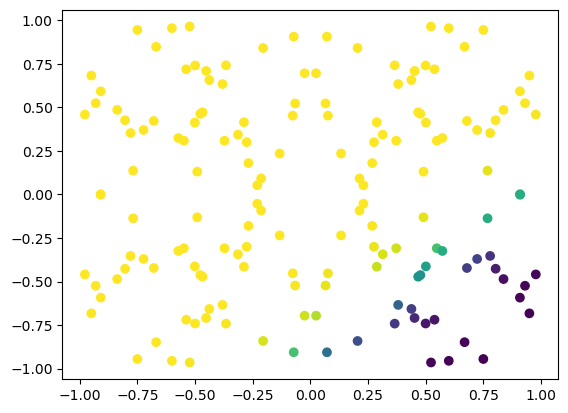

In [37]:
# PART 1 - 4
#Optimal Model TAHN
opmodel = Sequential()
opmodel.add(Dense(1, input_dim = 2, activation = 'tahn'))
opmodel.add(Dense(1, activation = 'tahn'))
opmodel.add(Dense(1, activation = 'tanh'))

opmodel.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

opmodel.fit(X, Y, epochs = 1000, batch_size = 4)

opscores = opmodel.evaluate(X, Y)
plt.scatter(*zip(*X), c = opmodel.predict(X))
print(opscores)

Epoch 1/1000
40/40 [==============================] - 1s 1ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 2/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 3/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 4/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 5/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 6/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 7/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 8/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 9/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 10/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000

40/40 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5437
Epoch 83/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4437
Epoch 84/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.3625
Epoch 85/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.3625
Epoch 86/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5312
Epoch 87/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4375
Epoch 88/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4875
Epoch 89/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4313
Epoch 90/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4938
Epoch 91/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5312
Epoc

40/40 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.6625
Epoch 243/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.6687
Epoch 244/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.6687
Epoch 245/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.6812
Epoch 246/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.6687
Epoch 247/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.6625
Epoch 248/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.6625
Epoch 249/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.6750
Epoch 250/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.6687
Epoch 251/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.6875
Epoch 403/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.6875
Epoch 404/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.6875
Epoch 405/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.6875
Epoch 406/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6558 - accuracy: 0.6875
Epoch 407/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6875
Epoch 408/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.6938
Epoch 409/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.6938
Epoch 410/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.6938
Epoch 411/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.6938
Epoch 563/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.6938
Epoch 564/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.6938
Epoch 565/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.6938
Epoch 566/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.6938
Epoch 567/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6186 - accuracy: 0.6938
Epoch 568/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6183 - accuracy: 0.6938
Epoch 569/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6182 - accuracy: 0.6938
Epoch 570/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.6938
Epoch 571/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.6875
Epoch 723/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6007 - accuracy: 0.6875
Epoch 724/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6005 - accuracy: 0.6875
Epoch 725/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6004 - accuracy: 0.6875
Epoch 726/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6004 - accuracy: 0.6875
Epoch 727/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6003 - accuracy: 0.6875
Epoch 728/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6002 - accuracy: 0.6875
Epoch 729/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6000 - accuracy: 0.6875
Epoch 730/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6000 - accuracy: 0.6875
Epoch 731/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.

40/40 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.6875
Epoch 883/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.6875
Epoch 884/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.6875
Epoch 885/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.6875
Epoch 886/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.6875
Epoch 887/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.6875
Epoch 888/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.6875
Epoch 889/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.6875
Epoch 890/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5912 - accuracy: 0.6875
Epoch 891/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5912 - accuracy: 0.

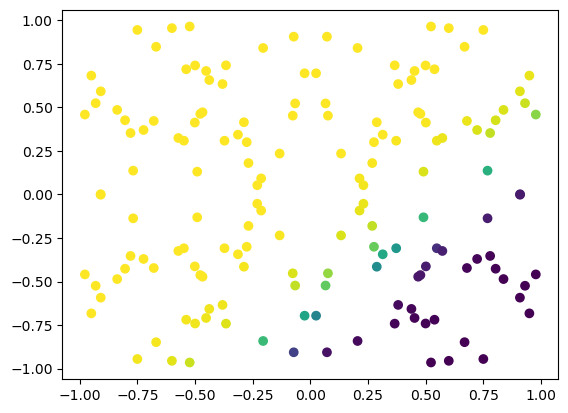

In [38]:
#Optimal Model SIGMOID
opmodel2 = Sequential()
opmodel2.add(Dense(1, input_dim = 2, activation = 'sigmoid'))
opmodel2.add(Dense(1, activation = 'sigmoid'))
opmodel2.add(Dense(1, activation = 'sigmoid'))

opmodel2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

opmodel2.fit(X, Y, epochs = 1000, batch_size = 4)

opscores2 = opmodel2.evaluate(X, Y)
plt.scatter(*zip(*X), c = opmodel2.predict(X))
print(opscores2)

Epoch 1/1000
40/40 [==============================] - 1s 1ms/step - loss: 0.8345 - accuracy: 0.5000
Epoch 2/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.8099 - accuracy: 0.5000
Epoch 3/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.7885 - accuracy: 0.5000
Epoch 4/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.7701 - accuracy: 0.5000
Epoch 5/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.7545 - accuracy: 0.5000
Epoch 6/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.7424 - accuracy: 0.5000
Epoch 7/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.7315 - accuracy: 0.5000
Epoch 8/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.7234 - accuracy: 0.5000
Epoch 9/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.7170 - accuracy: 0.5000
Epoch 10/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.7111 - accuracy: 0.5000

40/40 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.6313
Epoch 163/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.6313
Epoch 164/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.6313
Epoch 165/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.6313
Epoch 166/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.6313
Epoch 167/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.6313
Epoch 168/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.6375
Epoch 169/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6244 - accuracy: 0.6313
Epoch 170/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6241 - accuracy: 0.6313
Epoch 171/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.6812
Epoch 323/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.6812
Epoch 324/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.6750
Epoch 325/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.6812
Epoch 326/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.6812
Epoch 327/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5953 - accuracy: 0.6750
Epoch 328/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.6812
Epoch 329/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5950 - accuracy: 0.6812
Epoch 330/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5948 - accuracy: 0.6812
Epoch 331/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5947 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 0.5845 - accuracy: 0.6875
Epoch 483/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.6875
Epoch 484/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.6875
Epoch 485/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.6875
Epoch 486/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.6875
Epoch 487/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5841 - accuracy: 0.6875
Epoch 488/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.6875
Epoch 489/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6875
Epoch 490/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5841 - accuracy: 0.6875
Epoch 491/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5840 - accuracy: 0.

40/40 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.6938
Epoch 643/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.6938
Epoch 644/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.6938
Epoch 645/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.6938
Epoch 646/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.6938
Epoch 647/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.6938
Epoch 648/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.6938
Epoch 649/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.6938
Epoch 650/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.6938
Epoch 651/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.6875
Epoch 803/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.6875
Epoch 804/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5763 - accuracy: 0.6875
Epoch 805/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5764 - accuracy: 0.6875
Epoch 806/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5762 - accuracy: 0.6875
Epoch 807/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5763 - accuracy: 0.6875
Epoch 808/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5763 - accuracy: 0.6875
Epoch 809/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5766 - accuracy: 0.6875
Epoch 810/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5761 - accuracy: 0.6875
Epoch 811/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5762 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.6875
Epoch 963/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.6875
Epoch 964/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.6875
Epoch 965/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.6875
Epoch 966/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.6875
Epoch 967/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.6875
Epoch 968/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.6875
Epoch 969/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5748 - accuracy: 0.6875
Epoch 970/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.6875
Epoch 971/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.

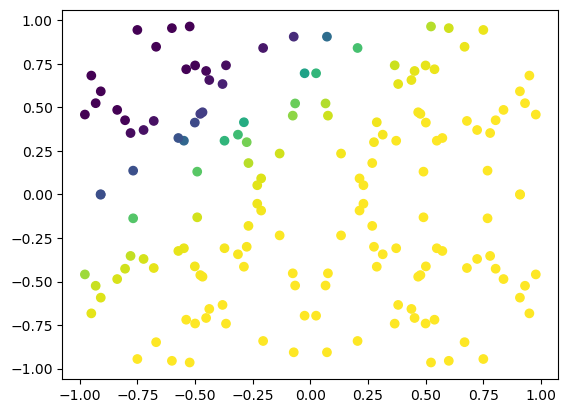

In [39]:
#Optimal Model SOFTPLUS
opmodel3 = Sequential()
opmodel3.add(Dense(1, input_dim = 2, activation = 'softplus'))
opmodel3.add(Dense(1, activation = 'softplus'))
opmodel3.add(Dense(1, activation = 'softplus'))

opmodel3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

opmodel3.fit(X, Y, epochs = 1000, batch_size = 4)

opscores3 = opmodel3.evaluate(X, Y)
plt.scatter(*zip(*X), c = opmodel3.predict(X))
print(opscores3)

Epoch 1/1000
40/40 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000 
Epoch 4/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/1000
40/40 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/1000
40/40 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.500

40/40 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 163/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 164/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 165/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 166/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 167/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000 
Epoch 168/1000
40/40 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 169/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 170/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 171/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0

40/40 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 323/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 324/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 325/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 326/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000 
Epoch 327/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 328/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 329/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 330/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 331/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0

40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 483/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 484/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 485/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 486/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 487/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 488/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 489/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 490/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 491/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.

40/40 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 643/1000
40/40 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 644/1000
40/40 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 645/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 646/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 647/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 648/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 649/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 650/1000
40/40 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 651/1000
40/40 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 803/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 804/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 805/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 806/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 807/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 808/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 809/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 810/1000
40/40 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 811/1000
40/40 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.

40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 963/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000 
Epoch 964/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 965/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 966/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 967/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 968/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 969/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 970/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 971/1000
40/40 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0

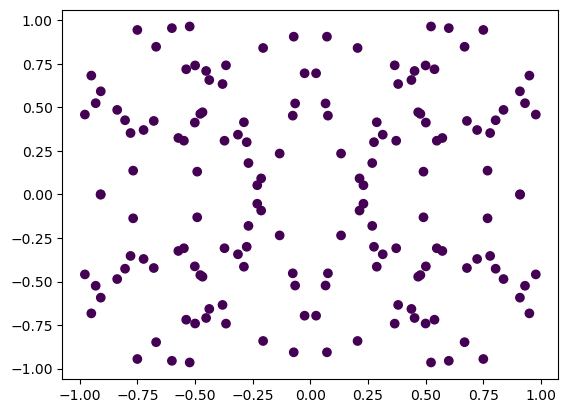

In [41]:
#Optimal Model RELU
opmodel4 = Sequential()
opmodel4.add(Dense(1, input_dim = 2, activation = 'relu'))
opmodel4.add(Dense(1, activation = 'relu'))
opmodel4.add(Dense(1, activation = 'relu'))

opmodel4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

opmodel4.fit(X, Y, epochs = 1000, batch_size = 4)

opscores4 = opmodel4.evaluate(X, Y)
plt.scatter(*zip(*X), c = opmodel4.predict(X))
print(opscores4)

In [47]:
# PART 2 -- Atherosclerotic heart disease (AHD) yes = 1, no = 0
data = pd.read_csv('Heart_Total_NN.csv')
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0
1,67,1,0,160,286,0,2,108,1,1.5,2,1
2,67,1,0,120,229,0,2,129,1,2.6,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0


In [61]:
x = data.iloc[:,0:11]
y = data.iloc[:,11:13]

In [85]:
# create model
mymodel = Sequential()
mymodel.add(Dense(16, input_dim = 11, activation = 'sigmoid'))
mymodel.add(Dense(16, activation = 'tanh'))
mymodel.add(Dense(1, activation = 'sigmoid'))

mymodel.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

mymodel.fit(x, y, epochs = 1000, batch_size = 10)

myscores = mymodel.evaluate(x, y)

Epoch 1/1000
31/31 [==============================] - 1s 2ms/step - loss: 0.6872 - accuracy: 0.5446
Epoch 2/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6337
Epoch 3/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.6700
Epoch 4/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6502
Epoch 5/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.6568
Epoch 6/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.6271
Epoch 7/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.6304
Epoch 8/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.6832
Epoch 9/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.6733
Epoch 10/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.7030

31/31 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7690
Epoch 163/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7657
Epoch 164/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7591
Epoch 165/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7558
Epoch 166/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7525
Epoch 167/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.7723
Epoch 168/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.7525
Epoch 169/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.7657
Epoch 170/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7657
Epoch 171/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.

31/31 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.7888
Epoch 323/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8053
Epoch 324/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8119
Epoch 325/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8053
Epoch 326/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8020
Epoch 327/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.7954
Epoch 328/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.7921
Epoch 329/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8053
Epoch 330/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8152
Epoch 331/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.

31/31 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8152
Epoch 483/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8053
Epoch 484/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8218
Epoch 485/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8020
Epoch 486/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8086
Epoch 487/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8086
Epoch 488/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8119
Epoch 489/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8152
Epoch 490/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8251
Epoch 491/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.

31/31 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8086
Epoch 643/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8152
Epoch 644/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8185
Epoch 645/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8119
Epoch 646/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8152
Epoch 647/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8119
Epoch 648/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8119
Epoch 649/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8119
Epoch 650/1000
31/31 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.8119
Epoch 651/1000
31/31 [==============================] - 0s 3ms/step - loss: 0.3780 - accuracy: 0.

31/31 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8053
Epoch 803/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8119
Epoch 804/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8185
Epoch 805/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3668 - accuracy: 0.8284
Epoch 806/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8251
Epoch 807/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8251
Epoch 808/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8284
Epoch 809/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8317
Epoch 810/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8251
Epoch 811/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.

31/31 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8284
Epoch 963/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8350
Epoch 964/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8350
Epoch 965/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8284
Epoch 966/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8416
Epoch 967/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8416
Epoch 968/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8251
Epoch 969/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8284
Epoch 970/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8251
Epoch 971/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.

In [ ]:
##any lower neurons or units or hidden layers only decreased accuracy and increased loss